# Experiment Results Analysis

Loading and analyzing results from:
- `skipconn_experiment_results.pkl` (Skip Connection Experiments)
- `boundary_attention_experiment_results.pkl` (Boundary Attention Experiments)

In [9]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

# Load the skip connection experiment results
with open("skipconn_experiment_results.pkl", "rb") as f:
    skipconn_results = pkl.load(f)

# Load the boundary attention experiment results
with open("boundary_attention_experiment_results.pkl", "rb") as f:
    boundary_results = pkl.load(f)

# Combine all results
all_results = skipconn_results + boundary_results

print(f"Loaded {len(skipconn_results)} skip connection experiment results")
print(f"Loaded {len(boundary_results)} boundary attention experiment results")
print(f"Total results: {len(all_results)}")
print(f"Total configurations: {len(set([r['description'] for r in all_results]))}")

Loaded 8 skip connection experiment results
Loaded 2 boundary attention experiment results
Total results: 10
Total configurations: 5


## Detailed Results Table

In [10]:
print("=" * 120)
print(f"{'Configuration':<45} {'Modality':<12} {'Skip':<8} {'Boundary':<12} {'Fold':<6} {'Best Dice':<12} {'Epoch':<8}")
print("=" * 120)

for result in all_results:
    boundary_str = 'Yes' if result.get('boundary_attention', False) else 'No'
    skip_str = 'Yes' if result.get('use_skip', False) else 'N/A'
    modality_str = result.get('modality', 'SP+HE')
    
    print(
        f"{result['description']:<45} "
        f"{modality_str:<12} "
        f"{skip_str:<8} "
        f"{boundary_str:<12} "
        f"{result['fold']:<6} "
        f"{result['best_dice']:<12.4f} "
        f"{result['best_epoch']:<8}"
    )

print("=" * 120)

Configuration                                 Modality     Skip     Boundary     Fold   Best Dice    Epoch   
SP+HE with Skip Connections                   SP+HE        Yes      No           1      0.4266       25      
SP+HE with Skip Connections                   SP+HE        Yes      No           2      0.5315       26      
SP+HE without Skip Connections                SP+HE        N/A      No           1      0.4121       24      
SP+HE without Skip Connections                SP+HE        N/A      No           2      0.4721       30      
SP-only with Skip Connections                 SP-only      Yes      No           1      0.4295       22      
SP-only with Skip Connections                 SP-only      Yes      No           2      0.5280       21      
SP-only without Skip Connections              SP-only      N/A      No           1      0.4036       26      
SP-only without Skip Connections              SP-only      N/A      No           2      0.4625       26      
SP+HE WITH

## Average Performance Across Folds

In [11]:
configs = [
    ("SP+HE with Skip Connections", "SP+HE", True, False),
    ("SP+HE without Skip Connections", "SP+HE", False, False),
    ("SP-only with Skip Connections", "SP-only", True, False),
    ("SP-only without Skip Connections", "SP-only", False, False),
    ("SP+HE WITH Boundary Attention", "SP+HE", True, True),
]

print("=" * 120)
print(f"{'Configuration':<45} {'Modality':<12} {'Skip':<8} {'Boundary':<12} {'Avg Dice ± Std':<25}")
print("=" * 120)

for desc, modality, use_skip, boundary_attention in configs:
    matching = [r for r in all_results if r["description"] == desc]
    if matching:
        avg_dice = np.mean([r["best_dice"] for r in matching])
        std_dice = np.std([r["best_dice"] for r in matching])
        skip_str = 'Yes' if use_skip else ('No' if not boundary_attention else 'Yes')
        boundary_str = 'Yes' if boundary_attention else 'No'
        print(
            f"{desc:<45} "
            f"{modality:<12} "
            f"{skip_str:<8} "
            f"{boundary_str:<12} "
            f"{avg_dice:.4f} ± {std_dice:.4f}"
        )

print("=" * 120)

Configuration                                 Modality     Skip     Boundary     Avg Dice ± Std           
SP+HE with Skip Connections                   SP+HE        Yes      No           0.4791 ± 0.0524
SP+HE without Skip Connections                SP+HE        No       No           0.4421 ± 0.0300
SP-only with Skip Connections                 SP-only      Yes      No           0.4787 ± 0.0492
SP-only without Skip Connections              SP-only      No       No           0.4330 ± 0.0295
SP+HE WITH Boundary Attention                 SP+HE        Yes      Yes          0.4737 ± 0.0438


## Key Findings: Skip Connections vs No Skip Connections

In [12]:
# Compare skip vs no skip (only from skipconn experiment)
skip_results = [r for r in skipconn_results if r["use_skip"]]
no_skip_results = [r for r in skipconn_results if not r["use_skip"]]
avg_skip = np.mean([r["best_dice"] for r in skip_results])
avg_no_skip = np.mean([r["best_dice"] for r in no_skip_results])

print("=" * 80)
print("SKIP CONNECTIONS COMPARISON (Skip Connection Experiment Only)")
print("=" * 80)
print(f"With Skip Connections:    {avg_skip:.4f}")
print(f"Without Skip Connections: {avg_no_skip:.4f}")
print(f"Difference:               {avg_skip - avg_no_skip:+.4f}")
print(f"Improvement:              {((avg_skip - avg_no_skip) / avg_no_skip * 100):+.2f}%")
print("=" * 80)

SKIP CONNECTIONS COMPARISON (Skip Connection Experiment Only)
With Skip Connections:    0.4789
Without Skip Connections: 0.4376
Difference:               +0.0413
Improvement:              +9.45%


## Key Findings: SP+HE vs SP-only

In [13]:
# Compare SP+HE vs SP-only (only from skipconn experiment)
sp_he_results = [r for r in skipconn_results if r["modality"] == "SP+HE"]
sp_only_results = [r for r in skipconn_results if r["modality"] == "SP-only"]
avg_sp_he = np.mean([r["best_dice"] for r in sp_he_results])
avg_sp_only = np.mean([r["best_dice"] for r in sp_only_results])

print("=" * 80)
print("MODALITY COMPARISON (Skip Connection Experiment Only)")
print("=" * 80)
print(f"SP+HE (Spatial Proteomics + H&E):  {avg_sp_he:.4f}")
print(f"SP-only (Spatial Proteomics):      {avg_sp_only:.4f}")
print(f"Difference:                        {avg_sp_he - avg_sp_only:+.4f}")
print(f"Improvement:                       {((avg_sp_he - avg_sp_only) / avg_sp_only * 100):+.2f}%")
print("=" * 80)

# Boundary Attention Performance
print("\n" + "=" * 80)
print("BOUNDARY ATTENTION PERFORMANCE")
print("=" * 80)
boundary_avg = np.mean([r["best_dice"] for r in boundary_results])
boundary_std = np.std([r["best_dice"] for r in boundary_results])
print(f"SP+HE WITH Boundary Attention: {boundary_avg:.4f} ± {boundary_std:.4f}")
print(f"Best fold performance: {max([r['best_dice'] for r in boundary_results]):.4f}")
print(f"Worst fold performance: {min([r['best_dice'] for r in boundary_results]):.4f}")
print("=" * 80)

MODALITY COMPARISON (Skip Connection Experiment Only)
SP+HE (Spatial Proteomics + H&E):  0.4606
SP-only (Spatial Proteomics):      0.4559
Difference:                        +0.0047
Improvement:                       +1.03%

BOUNDARY ATTENTION PERFORMANCE
SP+HE WITH Boundary Attention: 0.4737 ± 0.0438
Best fold performance: 0.5175
Worst fold performance: 0.4298


## Bar Chart: Best Dice Scores Comparison

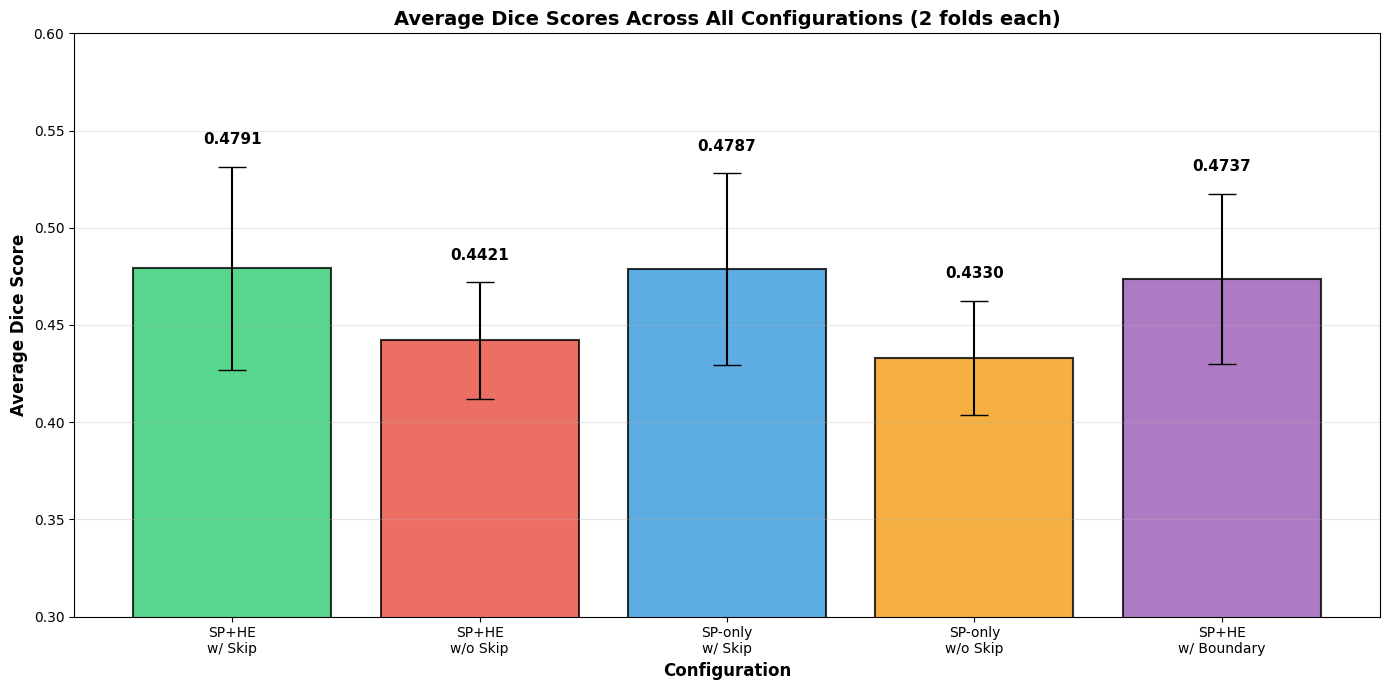


Best Configuration: SP+HE w/ Skip with Dice = 0.4791


In [14]:
config_labels = [
    "SP+HE\nw/ Skip",
    "SP+HE\nw/o Skip",
    "SP-only\nw/ Skip",
    "SP-only\nw/o Skip",
    "SP+HE\nw/ Boundary"
]

avg_dices = []
std_dices = []

for desc, modality, use_skip, boundary_attention in configs:
    matching = [r for r in all_results if r["description"] == desc]
    avg_dices.append(np.mean([r["best_dice"] for r in matching]))
    std_dices.append(np.std([r["best_dice"] for r in matching]))

fig, ax = plt.subplots(figsize=(14, 7))
x_pos = np.arange(len(config_labels))
colors = ['#2ecc71', '#e74c3c', '#3498db', '#f39c12', '#9b59b6']

bars = ax.bar(x_pos, avg_dices, yerr=std_dices, 
              color=colors, alpha=0.8, capsize=10, 
              edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (bar, avg, std) in enumerate(zip(bars, avg_dices, std_dices)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + std + 0.01,
            f'{avg:.4f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Configuration', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Dice Score', fontsize=12, fontweight='bold')
ax.set_title('Average Dice Scores Across All Configurations (2 folds each)', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(config_labels, fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0.3, 0.6])

plt.tight_layout()
plt.show()

print(f"\nBest Configuration: {config_labels[np.argmax(avg_dices)].replace(chr(10), ' ')} "
      f"with Dice = {max(avg_dices):.4f}")